# Libraries 📚

You can find more emojis on [Emojipedia](https://emojipedia.org/) and copy-paste them in your notebooks!

In [1]:
# Library for handling multi-dimensional data (lat, lon, time, etc.)
import xarray as xr
# Library for general handling of arrays
import numpy as np
# Library for handling cartographic projections
import cartopy.crs as ccrs
# Library for listing files in a directory
from os import listdir
# Library for plotting
import matplotlib.pyplot as plt

# Functions 📕

In [2]:
def weighted_spatial_mean(data):
    # ref: https://docs.xarray.dev/en/latest/examples/area_weighted_temperature.html

    # assign weights depending on latitude
    weights = np.cos(np.deg2rad(data.lat))
    # give the weights a name
    weights.name = "weights"
    # let the data know about the weights
    data_weighted = data.weighted(weights)
    # take the weighted spatial mean
    data_weighted_mean = data_weighted.mean(("lon", "lat"))
    return data_weighted_mean

# Settings ⚙️

In [3]:
lat_bot_eas = 20
lat_top_eas = 53
lon_west_eas = 95
lon_east_eas = 133

# Section 1: Introducion of ensemble data

Let's explore the precipitation (`pr`) data from the [Meteorological Research Institute Earth System Model version 2.0](https://www.jstage.jst.go.jp/article/jmsj/97/5/97_2019-051/_article) (MRI-ESM2-0) simulations performed for the [Regional Aerosol Model Intercomparison Project](https://gmd.copernicus.org/articles/16/4451/2023/gmd-16-4451-2023.html) (RAMIP). [The Meteorological Research Institute](https://www.mri-jma.go.jp/) in Tsukuba, Ibaraki, Japan is the research arm of [Japan Meteorological Agency](https://www.jma.go.jp/jma/indexe.html). The MRI-ESM2-0 has a horizontal resolution of 100km for atmosphere and ocean components. The atmospheric component is vertically comprised of 80 model layers.

The directory structure for netCDF RAMIP data is: `/home/persad_research/SIMULATION_DATA/DATA/RAMIP/{model}/{experiment}/{ensemble_member}/{model_component}/{time_resolution}/{variable}`.

Let's try opening the **daily** resolution **precipitation** data from the **first ensemble member** of our **historical** experiment. Precipitation is modeled in the **atmosphere component** of MRI-ESM2-0. Inside the directory, there are two netCDF files that contain data for different time periods. We will need to make a **list** of the **paths** for each file (let's call the list `mri_historical_ens1_pr_paths`) and use xarray's `.open_mfdataset()` to open all the files in the list into a single xarray DataArray (let's call it `mri_historical_ens1_pr`).

In [4]:
directory_ens1 = '/home/persad_research/SIMULATION_DATA/DATA/RAMIP/MRI-ESM2-0/historical/r1i1p1f1/atm/day/pr/'

mri_historical_ens1_pr_paths = [directory_ens1 + file_name for file_name in listdir(directory_ens1) if '.nc' in file_name]

# we can also add additional filters by adding `and` statements 
# mri_historical_ens1_pr_paths = [directory + file_name for file_name in listdir(directory) if '.nc' in file_name
# and 'MRI-ESM2-0' in file_name and 'historical' in file_name and 'r1i1p1f1' in file_name and 'atm' in file_name and 'day' in file_name and 'pr' in file_name]

mri_historical_ens1_pr_paths.sort()
mri_historical_ens1_pr = xr.open_mfdataset(mri_historical_ens1_pr_paths)['pr']

Let's take a look at the list of paths we created for the two netCDF files we opened.

In [5]:
mri_historical_ens1_pr_paths

['/home/persad_research/SIMULATION_DATA/DATA/RAMIP/MRI-ESM2-0/historical/r1i1p1f1/atm/day/pr/pr_day_MRI-ESM2-0_historical_r1i1p1f1_gn_19500101-19991231.nc',
 '/home/persad_research/SIMULATION_DATA/DATA/RAMIP/MRI-ESM2-0/historical/r1i1p1f1/atm/day/pr/pr_day_MRI-ESM2-0_historical_r1i1p1f1_gn_20000101-20141231.nc']

Here is the single xarray DataArray we made from the two files.

In [6]:
mri_historical_ens1_pr

<xarray.DataArray 'pr' (time: 23741, lat: 160, lon: 320)> Size: 5GB
dask.array<concatenate, shape=(23741, 160, 320), dtype=float32, chunksize=(1, 160, 320), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 190kB 1950-01-01T12:00:00 ... 2014-12-31T1...
  * lat      (lat) float64 1kB -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    original_name:  PRECIPI
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-05-10T01:34:30Z altered by CMOR: replaced missing va...

Since we can see that the units are still in mass flux ($\text{kg m}^{-2}\,\text{s}^{-1}$), let's convert the units to a more common one we find for day-to-day presentation of precipitation values ($\text{mm day}^{-1}$).

In [7]:
mri_historical_ens1_pr_mm_day = mri_historical_ens1_pr * 86400
mri_historical_ens1_pr_mm_day.attrs["units"] = "mm day-1"

In [8]:
mri_historical_ens1_pr_mm_day

<xarray.DataArray 'pr' (time: 23741, lat: 160, lon: 320)> Size: 5GB
dask.array<mul, shape=(23741, 160, 320), dtype=float32, chunksize=(1, 160, 320), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 190kB 1950-01-01T12:00:00 ... 2014-12-31T1...
  * lat      (lat) float64 1kB -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
Attributes:
    units:    mm day-1

Let's plot the timeseries of precipitation, averaged across East Asia.

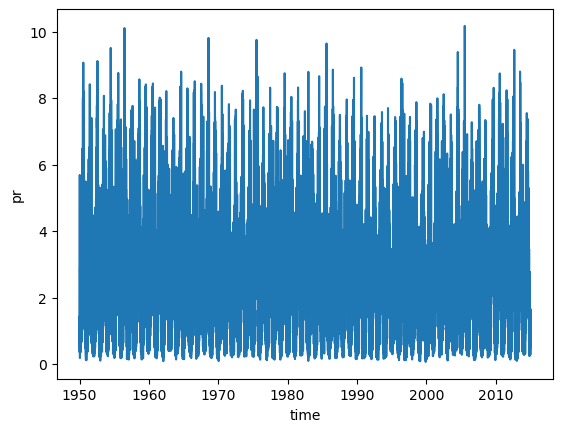

In [9]:
mri_historical_ens1_pr_mm_day_eas = mri_historical_ens1_pr_mm_day.sel(lat=slice(lat_bot_eas, lat_top_eas), lon=slice(lon_west_eas, lon_east_eas))
weighted_spatial_mean(mri_historical_ens1_pr_mm_day_eas).plot();

Let's open precipitation data for **all ensemble members** from **MRI-ESM2-0**'s **historical** experiment. We have 10 ensemble members in total.

In [10]:
# ensemble member 2
directory_ens2 = '/home/persad_research/SIMULATION_DATA/DATA/RAMIP/MRI-ESM2-0/historical/r2i1p1f1/atm/day/pr/'
mri_historical_ens2_pr_paths = [directory_ens2 + file_name for file_name in listdir(directory_ens2) if '.nc' in file_name]
mri_historical_ens2_pr_paths.sort()
mri_historical_ens2_pr = xr.open_mfdataset(mri_historical_ens2_pr_paths)['pr']

# ensemble member 3
directory_ens3 = '/home/persad_research/SIMULATION_DATA/DATA/RAMIP/MRI-ESM2-0/historical/r3i1p1f1/atm/day/pr/'
mri_historical_ens3_pr_paths = [directory_ens3 + file_name for file_name in listdir(directory_ens3) if '.nc' in file_name]
mri_historical_ens3_pr_paths.sort()
mri_historical_ens3_pr = xr.open_mfdataset(mri_historical_ens3_pr_paths)['pr']

# ensemble member 4
directory_ens4 = '/home/persad_research/SIMULATION_DATA/DATA/RAMIP/MRI-ESM2-0/historical/r4i1p1f1/atm/day/pr/'
mri_historical_ens4_pr_paths = [directory_ens4 + file_name for file_name in listdir(directory_ens4) if '.nc' in file_name]
mri_historical_ens4_pr_paths.sort()
mri_historical_ens4_pr = xr.open_mfdataset(mri_historical_ens4_pr_paths)['pr']

# ensemble member 5
directory_ens5 = '/home/persad_research/SIMULATION_DATA/DATA/RAMIP/MRI-ESM2-0/historical/r5i1p1f1/atm/day/pr/'
mri_historical_ens5_pr_paths = [directory_ens5 + file_name for file_name in listdir(directory_ens5) if '.nc' in file_name]
mri_historical_ens5_pr_paths.sort()
mri_historical_ens5_pr = xr.open_mfdataset(mri_historical_ens5_pr_paths)['pr']

# ensemble member 6
directory_ens6 = '/home/persad_research/SIMULATION_DATA/DATA/RAMIP/MRI-ESM2-0/historical/r6i1p1f1/atm/day/pr/'
mri_historical_ens6_pr_paths = [directory_ens6 + file_name for file_name in listdir(directory_ens6) if '.nc' in file_name]
mri_historical_ens6_pr_paths.sort()
mri_historical_ens6_pr = xr.open_mfdataset(mri_historical_ens6_pr_paths)['pr']

# ensemble member 7
directory_ens7 = '/home/persad_research/SIMULATION_DATA/DATA/RAMIP/MRI-ESM2-0/historical/r7i1p1f1/atm/day/pr/'
mri_historical_ens7_pr_paths = [directory_ens7 + file_name for file_name in listdir(directory_ens7) if '.nc' in file_name]
mri_historical_ens7_pr_paths.sort()
mri_historical_ens7_pr = xr.open_mfdataset(mri_historical_ens7_pr_paths)['pr']

# ensemble member 8
directory_ens8 = '/home/persad_research/SIMULATION_DATA/DATA/RAMIP/MRI-ESM2-0/historical/r8i1p1f1/atm/day/pr/'
mri_historical_ens8_pr_paths = [directory_ens8 + file_name for file_name in listdir(directory_ens8) if '.nc' in file_name]
mri_historical_ens8_pr_paths.sort()
mri_historical_ens8_pr = xr.open_mfdataset(mri_historical_ens8_pr_paths)['pr']

# ensemble member 9
directory_ens9 = '/home/persad_research/SIMULATION_DATA/DATA/RAMIP/MRI-ESM2-0/historical/r9i1p1f1/atm/day/pr/'
mri_historical_ens9_pr_paths = [directory_ens9 + file_name for file_name in listdir(directory_ens9) if '.nc' in file_name]
mri_historical_ens9_pr_paths.sort()
mri_historical_ens9_pr = xr.open_mfdataset(mri_historical_ens9_pr_paths)['pr']

# ensemble member 10
directory_ens10 = '/home/persad_research/SIMULATION_DATA/DATA/RAMIP/MRI-ESM2-0/historical/r10i1p1f1/atm/day/pr/'
mri_historical_ens10_pr_paths = [directory_ens10 + file_name for file_name in listdir(directory_ens10) if '.nc' in file_name]
mri_historical_ens10_pr_paths.sort()
mri_historical_ens10_pr = xr.open_mfdataset(mri_historical_ens10_pr_paths)['pr']


Now we have 10 xarray DataArrays, each containing the precipitation data for a different ensemble member. Let's **concatenate** them into a single xarray DataArray using xarray's `.concat()`.

In [11]:
mri_historical_pr = xr.concat(
    [mri_historical_ens1_pr, mri_historical_ens2_pr, mri_historical_ens3_pr, 
     mri_historical_ens4_pr, mri_historical_ens5_pr, mri_historical_ens6_pr,
     mri_historical_ens7_pr, mri_historical_ens8_pr, mri_historical_ens9_pr,
     mri_historical_ens10_pr],
    dim='member'
).assign_coords(member=['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r5i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1', 'r9i1p1f1', 'r10i1p1f1'])

In [12]:
mri_historical_pr

<xarray.DataArray 'pr' (member: 10, time: 23741, lat: 160, lon: 320)> Size: 49GB
dask.array<concatenate, shape=(10, 23741, 160, 320), dtype=float32, chunksize=(1, 1, 160, 320), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 190kB 1950-01-01T12:00:00 ... 2014-12-31T1...
  * lat      (lat) float64 1kB -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * member   (member) <U9 360B 'r1i1p1f1' 'r2i1p1f1' ... 'r9i1p1f1' 'r10i1p1f1'
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    original_name:  PRECIPI
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-05-10T01:34:30Z altered by CMOR: replaced missing va...

**BUT** that seemed like a really long way to open the data across ensemble member. **Here's a quicker way you can open the data!**
1. Create an empty list to store xarray DataArrays for single ensemble members: `ensemble_members`
2. Loop through the ensemble members by (a) opening the directory for the ensemble member, (b) creating a list of paths with all the files for the single ensemble member, (c) use xarray's `.open_mfdataset()` to open the `pr` variable in all the files listed in `paths`, (d) append the xarray DataArray to our list of xarray DataArrays called `ensemble_members`.
3. Concatenate all the xarray DataArrays in `ensemble_members` under a new dimension called `member`.
4. Assign the coordinates for each member so that we would know which data belongs to which ensemble member.

In [13]:
# Keep this in mind for whenever you have to open data across multiple ensemble members!

ensemble_members = []
for i in range(1, 11):
    directory = f'/home/persad_research/SIMULATION_DATA/DATA/RAMIP/MRI-ESM2-0/historical/r{i}i1p1f1/atm/day/pr/'
    paths = sorted([directory + f for f in listdir(directory) if '.nc' in f])
    pr = xr.open_mfdataset(paths)['pr']
    ensemble_members.append(pr)
mri_historical_pr = xr.concat(ensemble_members, dim='member')
mri_historical_pr = mri_historical_pr.assign_coords(member=[f'r{i}i1p1f1' for i in range(1, 11)])

Let's take only data from two years and save it into memory using `.compute`.

In [14]:
mri_historical_pr_1961_1962 = mri_historical_pr.sel(time=slice('1961-01-01', '1962-12-31'))
mri_historical_pr_1961_1962.compute()

<xarray.DataArray 'pr' (member: 10, time: 730, lat: 160, lon: 320)> Size: 1GB
array([[[[2.62210665e-06, 2.47305024e-06, 2.28874069e-06, ...,
          3.29123304e-06, 3.06283800e-06, 2.85102851e-06],
         [3.92443508e-06, 3.27557905e-06, 2.50969242e-06, ...,
          4.28117619e-06, 4.20924653e-06, 4.68289727e-06],
         [3.62157607e-06, 4.12666350e-06, 4.08227925e-06, ...,
          3.51891526e-06, 4.36640767e-06, 3.93613800e-06],
         ...,
         [1.28109514e-06, 1.28534816e-06, 1.51534027e-06, ...,
          1.13409453e-06, 1.29941907e-06, 1.28737861e-06],
         [1.51525774e-06, 1.51984659e-06, 1.52397854e-06, ...,
          1.54521388e-06, 1.53400379e-06, 1.51516781e-06],
         [2.14007355e-06, 2.13787507e-06, 2.16853960e-06, ...,
          2.13625776e-06, 2.14173838e-06, 2.13941325e-06]],

        [[3.66838009e-08, 4.57399807e-08, 6.18515088e-08, ...,
          3.36072752e-08, 3.28896910e-08, 3.39269342e-08],
         [5.88338480e-07, 2.85325001e-07, 3.36780772e-07, ...,
          1.54959139e-06, 7.28067221e-07, 6.36120092e-07],
         [5.34591527e-06, 4.35382753e-06, 4.46331796e-06, ...,
          5.14699877e-06, 5.75723607e-06, 5.70463044e-06],
...
          2.09362085e-07, 1.70513289e-07, 1.28100282e-07],
         [2.76801093e-09, 1.76713089e-09, 1.42044165e-09, ...,
          5.92956795e-09, 4.30538938e-09, 4.05193745e-09],
         [5.26814981e-10, 5.31284239e-10, 5.35537226e-10, ...,
          5.20323062e-10, 5.17384913e-10, 5.21380328e-10]],

        [[3.67751312e-07, 3.61110523e-07, 3.55406229e-07, ...,
          3.55451277e-07, 3.59511176e-07, 4.04011331e-07],
         [6.31163573e-07, 6.60444471e-07, 6.63676644e-07, ...,
          5.68670998e-07, 5.89294189e-07, 6.13510906e-07],
         [2.74305171e-06, 2.36223559e-06, 2.20964466e-06, ...,
          2.06205095e-06, 2.51102551e-06, 2.83879149e-06],
         ...,
         [1.35410176e-07, 1.36592732e-07, 1.55852234e-07, ...,
          1.59997811e-07, 1.46513003e-07, 1.33731902e-07],
         [2.65611703e-07, 2.63340837e-07, 2.13689532e-07, ...,
          2.08290729e-07, 2.23134052e-07, 2.36180426e-07],
         [1.80142763e-07, 1.79223775e-07, 1.79873879e-07, ...,
          1.92352630e-07, 1.88016642e-07, 1.83506685e-07]]]],
      shape=(10, 730, 160, 320), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 6kB 1961-01-01T12:00:00 ... 1962-12-31T12:...
  * lat      (lat) float64 1kB -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * member   (member) <U9 360B 'r1i1p1f1' 'r2i1p1f1' ... 'r9i1p1f1' 'r10i1p1f1'
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    original_name:  PRECIPI
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-05-10T01:34:30Z altered by CMOR: replaced missing va...

Let's convert the units and plot timeseries of average precipitation across East Asia. This time, we will see 10 lines, corresponding to each ensemble member.

In [15]:
mri_historical_pr_1961_1962_mm_day = (mri_historical_pr_1961_1962 * 86400)
mri_historical_pr_1961_1962_mm_day.attrs["units"] = "mm day-1"

In [16]:
mri_historical_pr_1961_1962_mm_day_eas = mri_historical_pr_1961_1962_mm_day.sel(lat=slice(lat_bot_eas, lat_top_eas), lon=slice(lon_west_eas, lon_east_eas))
mri_historical_pr_1961_1962_mm_day_eas_avg = weighted_spatial_mean(mri_historical_pr_1961_1962_mm_day_eas)

If we have data for multiple ensembles, using xarray's `.plot()` will result in a heatmap instead of a line plot.

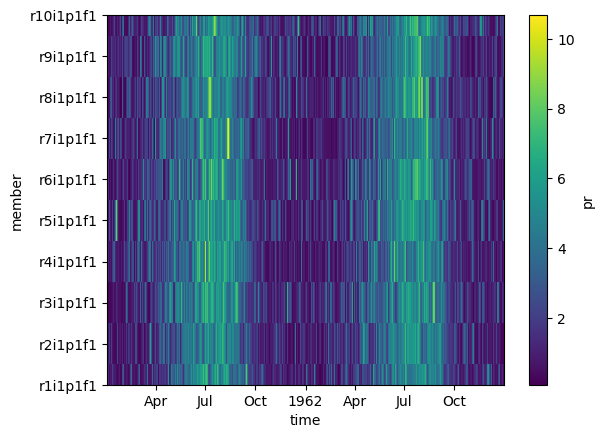

In [17]:
mri_historical_pr_1961_1962_mm_day_eas_avg.plot();

Here is a code block you can use (and modify) to make the timeseries of the precipitation from multiple ensembles.

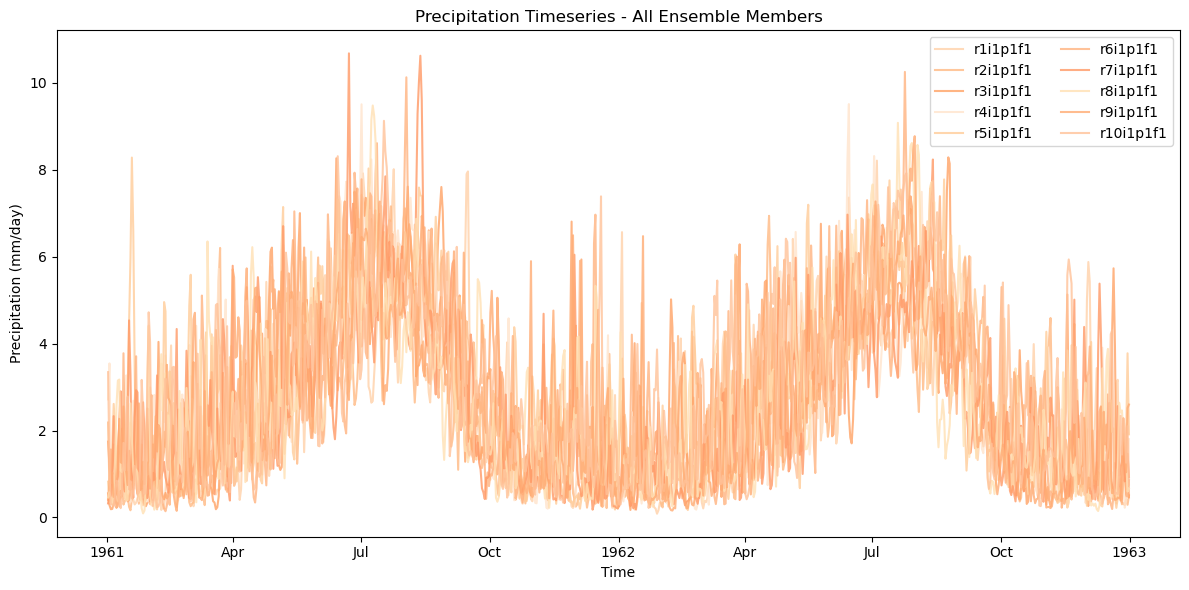

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

# Pastel orange-hued color palette
pastel_orange_colors = [
    '#FFD1A9',  # Light peach
    '#FFBA84',  # Pastel orange
    '#FFA366',  # Soft tangerine
    '#FFE4CC',  # Cream peach
    '#FFCC99',  # Light apricot
    '#FFB380',  # Mellow orange
    '#FF9966',  # Coral orange
    '#FFE0B3',  # Pale orange
    '#FFAB73',  # Soft orange
    '#FFC299',  # Peachy orange
]

for i, member in enumerate(mri_historical_pr_1961_1962_mm_day_eas_avg.member):
    mri_historical_pr_1961_1962_mm_day_eas_avg.sel(member=member).plot(
        ax=ax,
        label=f'{member.values}',
        color=pastel_orange_colors[i],
        linewidth=1.5,
        alpha=0.8
    )

ax.set_xlabel('Time')
ax.set_ylabel('Precipitation (mm/day)')
ax.set_title('Precipitation Timeseries - All Ensemble Members')
ax.legend(loc='best', ncol=2)

# Show or hide grid
# ax.grid(True, alpha=0.3)
ax.grid(False)

plt.tight_layout()
plt.show()

# Practice

Try playing with the code block to modify our plot - some ideas:
1. Change the colors (Google hex codes of colors you would want to use)
2. Try showing and hiding the gridlines
3. Look up how you could change the font size of the tickmarks, y and x axis labels, and figure title

Try accessing data from other models we have in our machines: NorESM2-LM, CESM2, SPEAR, etc.

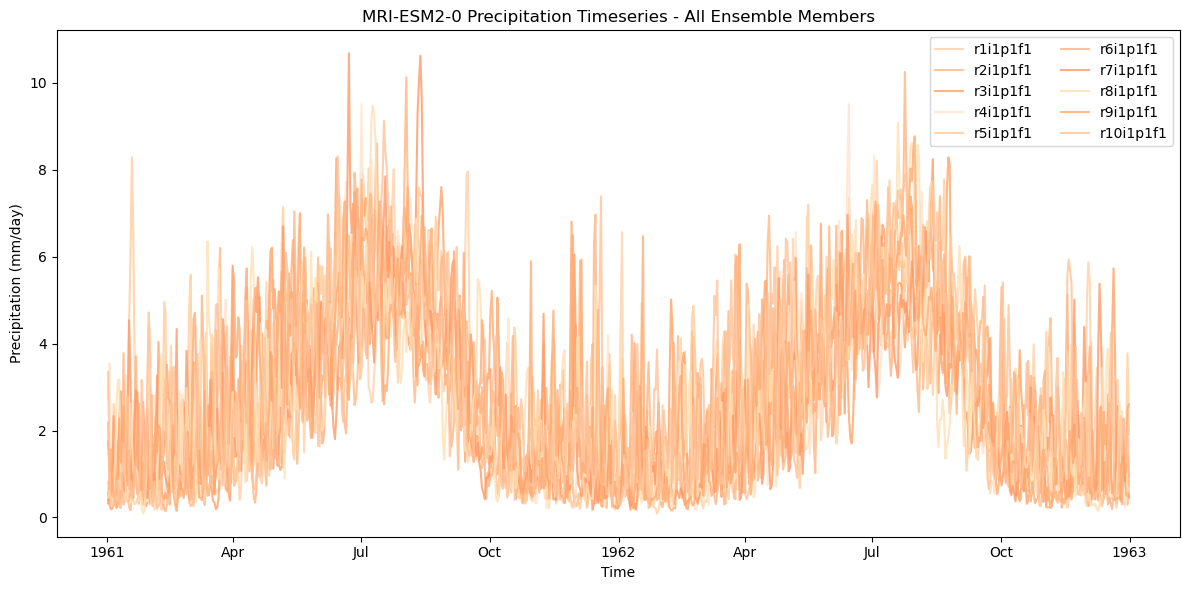

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))

# Pastel orange-hued color palette
pastel_orange_colors = [
    '#FFD1A9',  # Light peach
    '#FFBA84',  # Pastel orange
    '#FFA366',  # Soft tangerine
    '#FFE4CC',  # Cream peach
    '#FFCC99',  # Light apricot
    '#FFB380',  # Mellow orange
    '#FF9966',  # Coral orange
    '#FFE0B3',  # Pale orange
    '#FFAB73',  # Soft orange
    '#FFC299',  # Peachy orange
]

for i, member in enumerate(mri_historical_pr_1961_1962_mm_day_eas_avg.member):
    mri_historical_pr_1961_1962_mm_day_eas_avg.sel(member=member).plot(
        ax=ax,
        label=f'{member.values}',
        color=pastel_orange_colors[i],
        linewidth=1.5,
        alpha=0.8
    )

ax.set_xlabel('Time')
ax.set_ylabel('Precipitation (mm/day)')
ax.set_title('MRI-ESM2-0 Precipitation Timeseries - All Ensemble Members')
ax.legend(loc='best', ncol=2)

# Show or hide grid
# ax.grid(True, alpha=0.3)
ax.grid(False)

plt.tight_layout()
plt.show()

In [37]:
# Keep this in mind for whenever you have to open data across multiple ensemble members!

ensemble_members = []
for i in range(1, 4):
    directory = f'/home/persad_research/SIMULATION_DATA/DATA/RAMIP/NorESM2-LM/historical/r{i}i1p1f1/atm/day/pr/'
    paths = sorted([directory + f for f in listdir(directory) if '.nc' in f])
    pr = xr.open_mfdataset(paths)['pr']
    ensemble_members.append(pr)
noresm_historical_pr = xr.concat(ensemble_members, dim='member')
noresm_historical_pr = mri_historical_pr.assign_coords(member=[f'r{i}i1p1f1' for i in range(1, 4)])

ValueError: conflicting sizes for dimension 'member': length 10 on <this-array> and length 3 on {'time': 'time', 'lat': 'lat', 'lon': 'lon', 'member': 'member'}

In [38]:
noresm_historical_pr

<xarray.DataArray 'pr' (member: 3, time: 14600, lat: 96, lon: 144)> Size: 2GB
dask.array<concatenate, shape=(3, 14600, 96, 144), dtype=float32, chunksize=(1, 1, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 117kB 1960-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: member
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    original_name:  PRECT
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-15T17:17:16Z altered by CMOR: Converted type from...

In [39]:
noresm_historical_pr_mmday = (noresm_historical_pr * 86400)
noresm_historical_pr_mmday.attrs["units"] = "mm/day"
noresm_historical_pr_mmday

<xarray.DataArray 'pr' (member: 3, time: 14600, lat: 96, lon: 144)> Size: 2GB
dask.array<mul, shape=(3, 14600, 96, 144), dtype=float32, chunksize=(1, 1, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 117kB 1960-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: member
Attributes:
    units:    mm/day

In [40]:
noresm_historical_pr_mmday_1961_1962 = noresm_historical_pr_mmday.sel(time=slice('1961-01-01', '1962-12-31'))
noresm_historical_pr_mmday_1961_1962.compute()

<xarray.DataArray 'pr' (member: 3, time: 730, lat: 96, lon: 144)> Size: 121MB
array([[[[1.34891393e-02, 1.34890955e-02, 1.34890880e-02, ...,
          1.34891532e-02, 1.34891532e-02, 1.34891486e-02],
         [8.52790394e-10, 5.48207486e-12, 1.80405524e-10, ...,
          2.62311577e-08, 9.66347802e-09, 4.95513719e-09],
         [1.01011111e-08, 8.91656171e-09, 4.04038225e-09, ...,
          3.32481491e-08, 3.04358814e-08, 2.88101507e-08],
         ...,
         [2.02277719e-04, 1.62480632e-04, 1.41099401e-04, ...,
          3.73976957e-03, 1.67175324e-03, 5.64567745e-04],
         [9.53956395e-02, 8.65874439e-02, 7.56739452e-02, ...,
          1.43711641e-01, 1.24091670e-01, 1.10097207e-01],
         [4.43485200e-01, 4.43866223e-01, 4.44244742e-01, ...,
          4.43581998e-01, 4.43492413e-01, 4.43576336e-01]],

        [[1.14153841e-06, 1.14157592e-06, 1.14159229e-06, ...,
          1.14151430e-06, 1.14151624e-06, 1.14152306e-06],
         [1.18024174e-04, 1.02104605e-04, 8.36297113e-05, ...,
          8.26677642e-05, 1.24005790e-04, 1.39949450e-04],
         [1.42649217e-02, 8.34024698e-03, 8.53675697e-03, ...,
          4.93199425e-03, 3.46496725e-03, 1.06195025e-02],
...
          7.35457763e-02, 6.23675361e-02, 5.92409931e-02],
         [3.19152959e-02, 5.11486903e-02, 7.89225325e-02, ...,
          3.08953226e-02, 2.69912519e-02, 2.57148724e-02],
         [2.90131986e-01, 2.90766090e-01, 2.91197270e-01, ...,
          2.90609568e-01, 2.90300757e-01, 2.90469378e-01]],

        [[3.75127271e-02, 3.75127345e-02, 3.75127345e-02, ...,
          3.75127234e-02, 3.75127234e-02, 3.75127271e-02],
         [4.36370647e-05, 4.14889910e-05, 3.08913332e-05, ...,
          4.69306797e-05, 4.55679801e-05, 4.51860797e-05],
         [2.29362468e-06, 3.33463163e-06, 4.87920943e-06, ...,
          1.16975222e-07, 4.94500171e-07, 1.21354014e-06],
         ...,
         [2.67602742e-01, 2.52425760e-01, 2.12636694e-01, ...,
          2.51813829e-01, 2.63500959e-01, 2.71231651e-01],
         [5.25312796e-02, 5.00425585e-02, 4.74018268e-02, ...,
          5.77618964e-02, 5.64617589e-02, 5.47754653e-02],
         [4.74841073e-02, 4.74847108e-02, 4.74893190e-02, ...,
          4.74836603e-02, 4.74838018e-02, 4.74839099e-02]]]],
      shape=(3, 730, 96, 144), dtype=float32)
Coordinates:
  * time     (time) object 6kB 1961-01-01 12:00:00 ... 1962-12-31 12:00:00
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: member
Attributes:
    units:    mm/day

In [41]:
noresm_historical_pr_mmday_1961_1962_eas = noresm_historical_pr_mmday_1961_1962.sel(lat=slice(lat_bot_eas, lat_top_eas), lon=slice(lon_west_eas, lon_east_eas))
noresm_historical_pr_mmday_1961_1962_eas_avg = weighted_spatial_mean(noresm_historical_pr_mmday_1961_1962_eas)

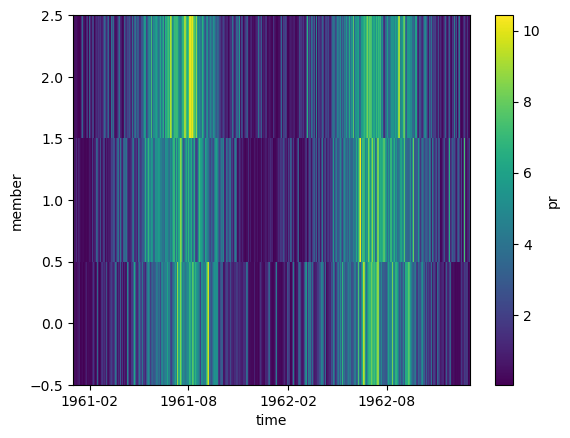

In [42]:
noresm_historical_pr_mmday_1961_1962_eas_avg.plot();

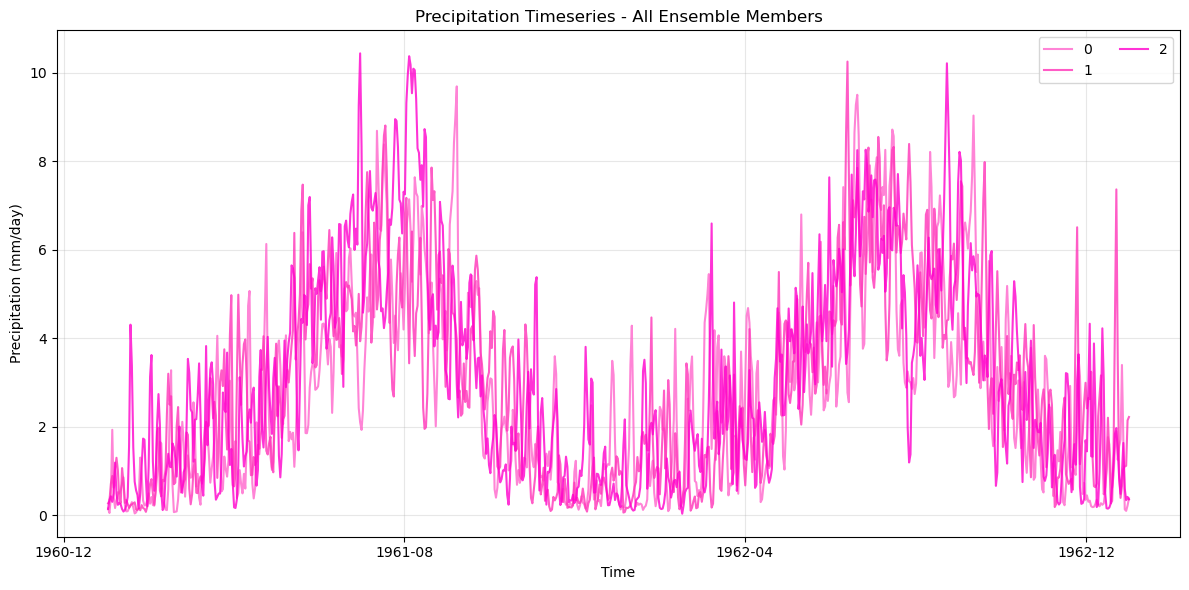

In [64]:
fig, ax = plt.subplots(figsize=(12, 6))

# Pastel color palette
bright_magenta_colors = [
    '#FF66CC',  # Vibrant pink
    '#FF33B8',  # Hot magenta
    '#FF00CC',  # Bright fuchsia
    '#FF99E6',  # Light candy pink
    '#FF4DD2',  # Electric rose
    '#FF1AD9',  # Neon magenta
    '#FF80FF',  # Bright orchid
    '#FF5CDE',  # Bold pink-lavender
    '#FF00B3',  # Deep magenta
    '#FF8CE5',  # Soft bright pink
]


for i, member in enumerate(noresm_historical_pr_mmday_1961_1962_eas_avg.member):
    noresm_historical_pr_mmday_1961_1962_eas_avg.sel(member=member).plot(
        ax=ax,
        label=f'{member.values}',
        color=bright_magenta_colors[i],
        linewidth=1.5,
        alpha=0.8
    )

ax.set_xlabel('Time')
ax.set_ylabel('Precipitation (mm/day)')
ax.set_title('Precipitation Timeseries - All Ensemble Members')
ax.legend(loc='best', ncol=2)

# Show or hide grid
# ax.grid(True, alpha=0.3)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
ensemble_members = []
for i in range(1, 11):
    directory = f'/home/persad_research/SIMULATION_DATA/DATA/RAMIP/CESM2/historical/r{i}i1p1f1/atm/day/pr/'
    paths = sorted([directory + f for f in listdir(directory) if '.nc' in f])
    pr = xr.open_mfdataset(paths)['PRECT']
    ensemble_members.append(pr)
cesm2_historical_pr = xr.concat(ensemble_members, dim='member')
cesm2_historical_pr = cesm2_historical_pr.assign_coords(member=[f'r{i}i1p1f1' for i in range(1, 11)])
cesm2_historical_pr

<xarray.DataArray 'PRECT' (member: 10, time: 14600, lat: 192, lon: 288)> Size: 32GB
dask.array<concatenate, shape=(10, 14600, 192, 288), dtype=float32, chunksize=(1, 1, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 117kB 1960-01-01 00:00:00 ... 1999-12-31 00:00:00
  * member   (member) <U9 360B 'r1i1p1f1' 'r2i1p1f1' ... 'r9i1p1f1' 'r10i1p1f1'
Attributes:
    units:         m/s
    long_name:     Total (convective and large-scale) precipitation rate (liq...
    cell_methods:  time: mean

In [26]:
cesm2_historical_pr_1961_1962 = cesm2_historical_pr.sel(time=slice('1961-01-01', '1962-12-31'))
cesm2_historical_pr_1961_1962.compute()

<xarray.DataArray 'PRECT' (member: 10, time: 730, lat: 192, lon: 288)> Size: 2GB
array([[[[1.29649125e-09, 1.29649125e-09, 1.29649125e-09, ...,
          1.29649125e-09, 1.29649125e-09, 1.29649125e-09],
         [2.06406625e-09, 2.06842565e-09, 2.07666129e-09, ...,
          2.05546336e-09, 2.05690043e-09, 2.06054618e-09],
         [3.12571968e-09, 3.18481241e-09, 3.23881166e-09, ...,
          2.95339975e-09, 3.00749337e-09, 3.06779757e-09],
         ...,
         [2.62433852e-09, 2.65263833e-09, 2.66448619e-09, ...,
          2.44487186e-09, 2.51874122e-09, 2.57332466e-09],
         [2.08916928e-09, 2.09140039e-09, 2.09170459e-09, ...,
          2.07215822e-09, 2.07734652e-09, 2.08586637e-09],
         [1.78841275e-09, 1.78804627e-09, 1.78793813e-09, ...,
          1.78893755e-09, 1.78875448e-09, 1.78858783e-09]],

        [[2.88890178e-09, 2.88890178e-09, 2.88890178e-09, ...,
          2.88890178e-09, 2.88890178e-09, 2.88890178e-09],
         [3.08353743e-09, 3.11298742e-09, 3.19559668e-09, ...,
          3.06721737e-09, 3.06574699e-09, 3.06904457e-09],
         [3.69239261e-09, 3.68182551e-09, 4.10203915e-09, ...,
          3.74938480e-09, 3.71731623e-09, 3.69026321e-09],
...
          4.15868895e-09, 4.06143341e-09, 3.95893496e-09],
         [3.51257956e-09, 3.49637896e-09, 3.47893003e-09, ...,
          3.60722074e-09, 3.57213925e-09, 3.53836693e-09],
         [3.31233396e-09, 3.31241123e-09, 3.31248140e-09, ...,
          3.31205108e-09, 3.31215522e-09, 3.31224914e-09]],

        [[9.02477815e-10, 9.02477815e-10, 9.02477815e-10, ...,
          9.02477815e-10, 9.02477815e-10, 9.02477815e-10],
         [9.12786291e-10, 9.47505518e-10, 9.84094584e-10, ...,
          8.13016876e-10, 8.48656811e-10, 8.81871631e-10],
         [9.06083431e-10, 9.50137524e-10, 9.83124138e-10, ...,
          7.37255756e-10, 7.96096189e-10, 8.56136939e-10],
         ...,
         [1.15272047e-09, 1.21114418e-09, 1.27061139e-09, ...,
          1.04516762e-09, 1.06643361e-09, 1.10265408e-09],
         [1.49332258e-09, 1.49757329e-09, 1.51005697e-09, ...,
          1.59445079e-09, 1.54507418e-09, 1.50959856e-09],
         [3.24192984e-09, 3.24249982e-09, 3.24301852e-09, ...,
          3.23984084e-09, 3.24060800e-09, 3.24130189e-09]]]],
      shape=(10, 730, 192, 288), dtype=float32)
Coordinates:
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 6kB 1961-01-01 00:00:00 ... 1962-12-31 00:00:00
  * member   (member) <U9 360B 'r1i1p1f1' 'r2i1p1f1' ... 'r9i1p1f1' 'r10i1p1f1'
Attributes:
    units:         m/s
    long_name:     Total (convective and large-scale) precipitation rate (liq...
    cell_methods:  time: mean

In [57]:
cesm2_historical_pr_1961_1962_mmday = (cesm2_historical_pr_1961_1962 * 86400 * 1000)
cesm2_historical_pr_1961_1962_mmday.attrs["units"] = "mm/day"
cesm2_historical_pr_1961_1962_mmday


<xarray.DataArray 'PRECT' (member: 10, time: 730, lat: 192, lon: 288)> Size: 2GB
dask.array<mul, shape=(10, 730, 192, 288), dtype=float32, chunksize=(1, 1, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 6kB 1961-01-01 00:00:00 ... 1962-12-31 00:00:00
  * member   (member) <U9 360B 'r1i1p1f1' 'r2i1p1f1' ... 'r9i1p1f1' 'r10i1p1f1'
Attributes:
    units:    mm/day

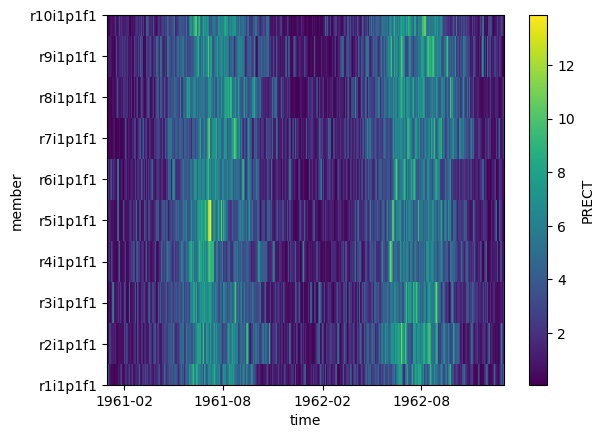

In [58]:
cesm2_historical_pr_1961_1962_mmday_eas = cesm2_historical_pr_1961_1962_mmday.sel(lat=slice(lat_bot_eas, lat_top_eas), lon=slice(lon_west_eas, lon_east_eas))
cesm2_historical_pr_1961_1962_mmday_eas_avg = weighted_spatial_mean(cesm2_historical_pr_1961_1962_mmday_eas)
cesm2_historical_pr_1961_1962_mmday_eas_avg.plot();

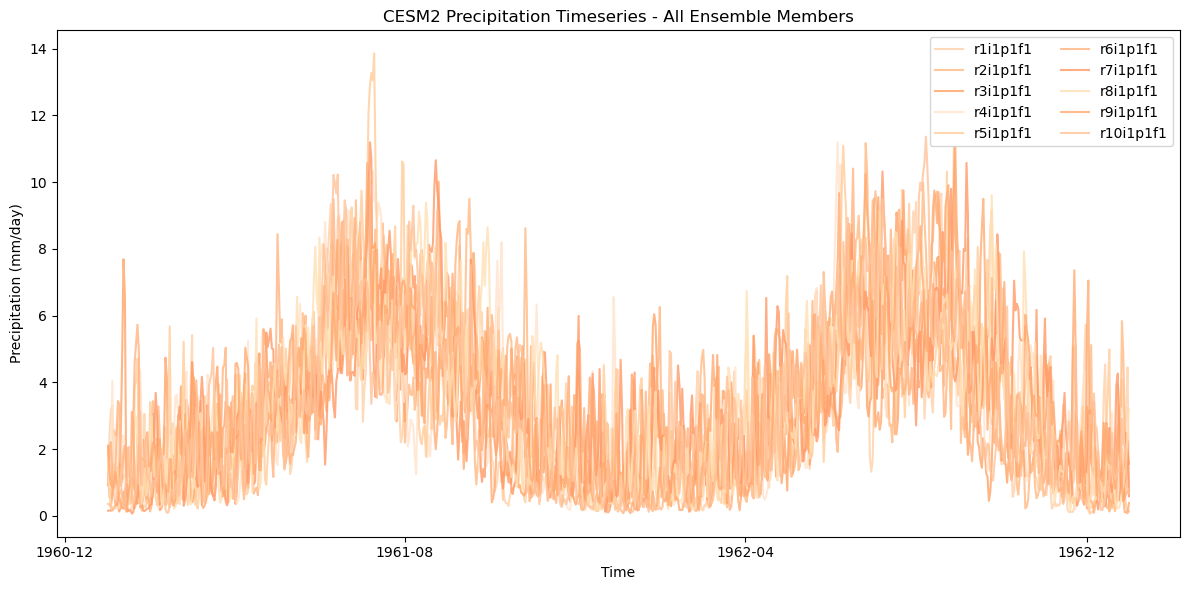

In [59]:
fig, ax = plt.subplots(figsize=(12, 6))

# Pastel orange-hued color palette
pastel_orange_colors = [
    '#FFD1A9',  # Light peach
    '#FFBA84',  # Pastel orange
    '#FFA366',  # Soft tangerine
    '#FFE4CC',  # Cream peach
    '#FFCC99',  # Light apricot
    '#FFB380',  # Mellow orange
    '#FF9966',  # Coral orange
    '#FFE0B3',  # Pale orange
    '#FFAB73',  # Soft orange
    '#FFC299',  # Peachy orange
]

for i, member in enumerate(cesm2_historical_pr_1961_1962_mmday_eas_avg.member):
    cesm2_historical_pr_1961_1962_mmday_eas_avg.sel(member=member).plot(
        ax=ax,
        label=f'{member.values}',
        color=pastel_orange_colors[i],
        linewidth=1.5,
        alpha=0.8
    )

ax.set_xlabel('Time')
ax.set_ylabel('Precipitation (mm/day)')
ax.set_title('CESM2 Precipitation Timeseries - All Ensemble Members')
ax.legend(loc='best', ncol=2)

# Show or hide grid
# ax.grid(True, alpha=0.3)
ax.grid(False)

plt.tight_layout()
plt.show()

In [60]:
ensemble_members = []
existing_members = [1, 3, 4]
for i in existing_members:
    directory = f'/home/persad_research/SIMULATION_DATA/DATA/RAMIP/EC-Earth3-AerChem/historical/r{i}i1p1f1/atm/day/pr/'
    paths = sorted([directory + f for f in listdir(directory) if '.nc' in f])
    pr = xr.open_mfdataset(paths)['pr']
    ensemble_members.append(pr)
ec_historical_pr = xr.concat(ensemble_members, dim='member')
ec_historical_pr = ec_historical_pr.assign_coords(member=[f'r{i}i1p1f1' for i in existing_members])

In [31]:
ec_historical_pr


<xarray.DataArray 'pr' (member: 3, time: 60265, lat: 512, lon: 512)> Size: 190GB
dask.array<concatenate, shape=(3, 60265, 512, 512), dtype=float32, chunksize=(1, 1, 256, 512), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 482kB 1850-01-01T12:00:00 ... 2014-12-31T1...
  * lat      (lat) float64 4kB -89.46 -89.46 -88.77 -88.77 ... 88.77 89.46 89.46
  * lon      (lon) float64 4kB 0.0 0.7031 1.406 2.109 ... 357.9 358.6 359.3
  * member   (member) <U8 96B 'r1i1p1f1' 'r3i1p1f1' 'r4i1p1f1'
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-05-02T03:56:38Z altered by CMOR: Reordered dimension...

In [32]:
ec_historical_pr_1961_1962 = ec_historical_pr.sel(time=slice('1961-01-01', '1962-12-31'))
ec_historical_pr_1961_1962.compute()

<xarray.DataArray 'pr' (member: 3, time: 730, lat: 512, lon: 512)> Size: 2GB
array([[[[ 1.65568448e-08,  1.63628204e-08,  1.61687943e-08, ...,
           1.65568448e-08,  1.65568448e-08,  1.65568448e-08],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [ 2.20757936e-08,  2.26147527e-08,  2.31537136e-08, ...,
           1.96504750e-08,  2.04589146e-08,  2.12673541e-08],
         ...,
         [ 1.88196145e-06,  1.89893865e-06,  1.91591585e-06, ...,
           1.86417572e-06,  1.87010426e-06,  1.87603280e-06],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [ 2.14687088e-06,  2.18509399e-06,  2.22331710e-06, ...,
           2.11951328e-06,  2.12863256e-06,  2.13775184e-06]],

        [[ 1.65568448e-08,  1.67508709e-08,  1.69448970e-08, ...,
           1.65568448e-08,  1.65568448e-08,  1.65568448e-08],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [-1.62797274e-25,  1.07791964e-09,  2.15583928e-09, ...,
          -1.62797274e-25, -1.62797274e-25, -1.62797274e-25],
...
                      nan,             nan,             nan],
         [ 6.62273791e-08,  6.48692051e-08,  6.35110240e-08, ...,
           6.56453025e-08,  6.58393304e-08,  6.60333583e-08],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [ 3.99019973e-06,  3.94111112e-06,  3.89202296e-06, ...,
           4.19509070e-06,  4.12679356e-06,  4.05849687e-06],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [ 1.10378968e-08,  1.16199734e-08,  1.22020500e-08, ...,
           1.10378968e-08,  1.10378968e-08,  1.10378968e-08],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]]]],
      shape=(3, 730, 512, 512), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 6kB 1961-01-01T12:00:00 ... 1962-12-31T12:...
  * lat      (lat) float64 4kB -89.46 -89.46 -88.77 -88.77 ... 88.77 89.46 89.46
  * lon      (lon) float64 4kB 0.0 0.7031 1.406 2.109 ... 357.9 358.6 359.3
  * member   (member) <U8 96B 'r1i1p1f1' 'r3i1p1f1' 'r4i1p1f1'
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-05-02T03:56:38Z altered by CMOR: Reordered dimension...

In [33]:
ec_historical_pr_1961_1962_mmday = (ec_historical_pr_1961_1962 * 86400)
ec_historical_pr_1961_1962_mmday.attrs["units"] = "mm/day"
ec_historical_pr_1961_1962_mmday

<xarray.DataArray 'pr' (member: 3, time: 730, lat: 512, lon: 512)> Size: 2GB
dask.array<mul, shape=(3, 730, 512, 512), dtype=float32, chunksize=(1, 1, 256, 512), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 6kB 1961-01-01T12:00:00 ... 1962-12-31T12:...
  * lat      (lat) float64 4kB -89.46 -89.46 -88.77 -88.77 ... 88.77 89.46 89.46
  * lon      (lon) float64 4kB 0.0 0.7031 1.406 2.109 ... 357.9 358.6 359.3
  * member   (member) <U8 96B 'r1i1p1f1' 'r3i1p1f1' 'r4i1p1f1'
Attributes:
    units:    mm/day

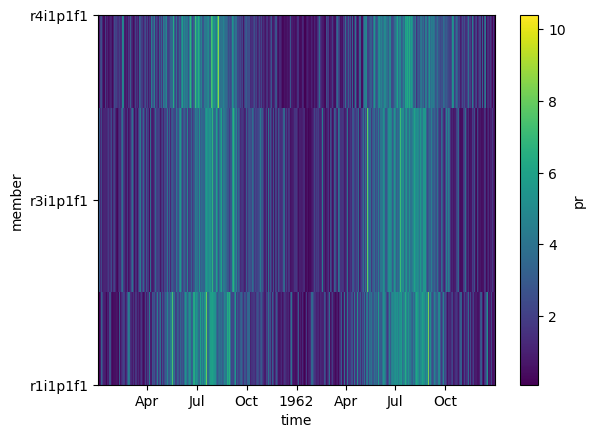

In [34]:
ec_historical_pr_1961_1962_mmday_eas = ec_historical_pr_1961_1962_mmday.sel(lat=slice(lat_bot_eas, lat_top_eas), lon=slice(lon_west_eas, lon_east_eas))
ec_historical_pr_1961_1962_mmday_eas_avg = weighted_spatial_mean(ec_historical_pr_1961_1962_mmday_eas)
ec_historical_pr_1961_1962_mmday_eas_avg.plot();

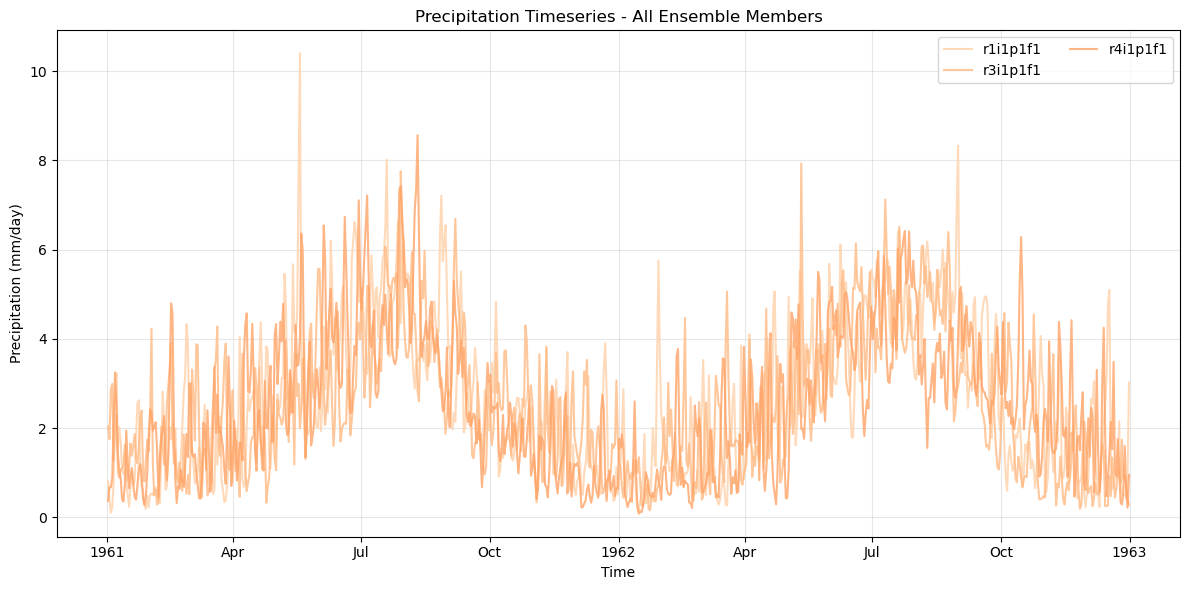

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

# Pastel orange-hued color palette
pastel_orange_colors = [
    '#FFD1A9',  # Light peach
    '#FFBA84',  # Pastel orange
    '#FFA366',  # Soft tangerine
    '#FFE4CC',  # Cream peach
    '#FFCC99',  # Light apricot
    '#FFB380',  # Mellow orange
    '#FF9966',  # Coral orange
    '#FFE0B3',  # Pale orange
    '#FFAB73',  # Soft orange
    '#FFC299',  # Peachy orange
]

for i, member in enumerate(ec_historical_pr_1961_1962_mmday_eas_avg.member):
    ec_historical_pr_1961_1962_mmday_eas_avg.sel(member=member).plot(
        ax=ax,
        label=f'{member.values}',
        color=pastel_orange_colors[i],
        linewidth=1.5,
        alpha=0.8
    )

ax.set_xlabel('Time')
ax.set_ylabel('Precipitation (mm/day)')
ax.set_title('EC-Earth3-AerChem Precipitation Timeseries - All Ensemble Members')
ax.legend(loc='best', ncol=2)

# Show or hide grid
# ax.grid(True, alpha=0.3)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [48]:
# First, let's inspect the time coordinate
print("EC-Earth3 time:")
print(ec_historical_pr_1961_1962_mmday_eas_avg.time)
print("\nCESM2 time:")
print(cesm2_historical_pr_1961_1962_mmday_eas_avg.time)

# Check the data type
print("\nEC-Earth3 time dtype:", ec_historical_pr_1961_1962_mmday_eas_avg.time.dtype)
print("CESM2 time dtype:", cesm2_historical_pr_1961_1962_mmday_eas_avg.time.dtype)

EC-Earth3 time:
<xarray.DataArray 'time' (time: 730)> Size: 6kB
array(['1961-01-01T12:00:00.000000000', '1961-01-02T12:00:00.000000000',
       '1961-01-03T12:00:00.000000000', ..., '1962-12-29T12:00:00.000000000',
       '1962-12-30T12:00:00.000000000', '1962-12-31T12:00:00.000000000'],
      shape=(730,), dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 6kB 1961-01-01T12:00:00 ... 1962-12-31T12:...

CESM2 time:
<xarray.DataArray 'time' (time: 730)> Size: 6kB
array([cftime.DatetimeNoLeap(1961, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1961, 1, 2, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1961, 1, 3, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(1962, 12, 29, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1962, 12, 30, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1962, 12, 31, 0, 0, 0, 0, has_year_zero=True)],
      shape=(730,), dtype=object)
Coordinates:
  * time 

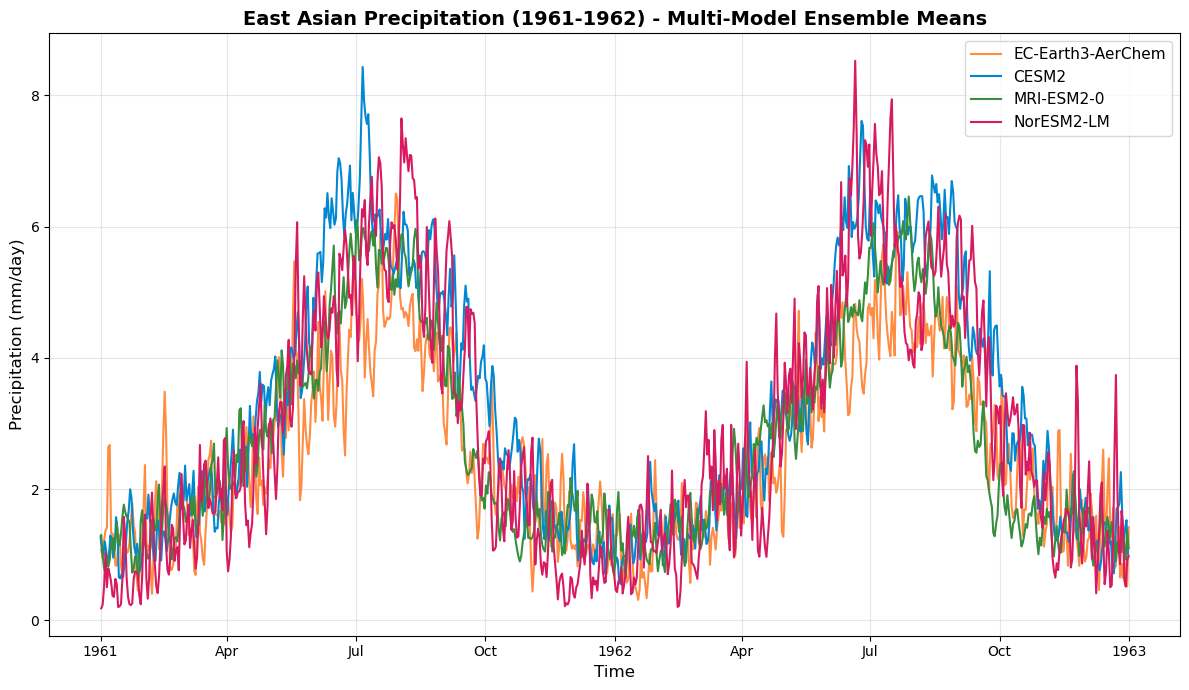

In [65]:
def fix_time(data):
    """Convert cftime to datetime64 using xarray's convert_calendar"""
    if data.time.dtype == 'object':
        # Use xarray's convert_calendar for cftime objects
        data = data.convert_calendar('standard', use_cftime=False)
    return data

ec_mean = ec_historical_pr_1961_1962_mmday_eas_avg.mean(dim='member')
cesm2_mean = fix_time(cesm2_historical_pr_1961_1962_mmday_eas_avg.mean(dim='member'))
mri_mean = fix_time(mri_historical_pr_1961_1962_mm_day_eas_avg.mean(dim='member'))
noresm_mean = fix_time(noresm_historical_pr_mmday_1961_1962_eas_avg.mean(dim='member'))


fig, ax = plt.subplots(figsize=(12, 7))

ec_mean.plot(ax=ax, label='EC-Earth3-AerChem', color='#FF8C42', linewidth=1.5)
cesm2_mean.plot(ax=ax, label='CESM2', color='#0288D1', linewidth=1.5)
mri_mean.plot(ax=ax, label='MRI-ESM2-0', color='#388E3C', linewidth=1.5)
noresm_mean.plot(ax=ax, label='NorESM2-LM', color='#D81B60', linewidth=1.5)

ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Precipitation (mm/day)', fontsize=12)
ax.set_title('East Asian Precipitation (1961-1962) - Multi-Model Ensemble Means', 
             fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (7).

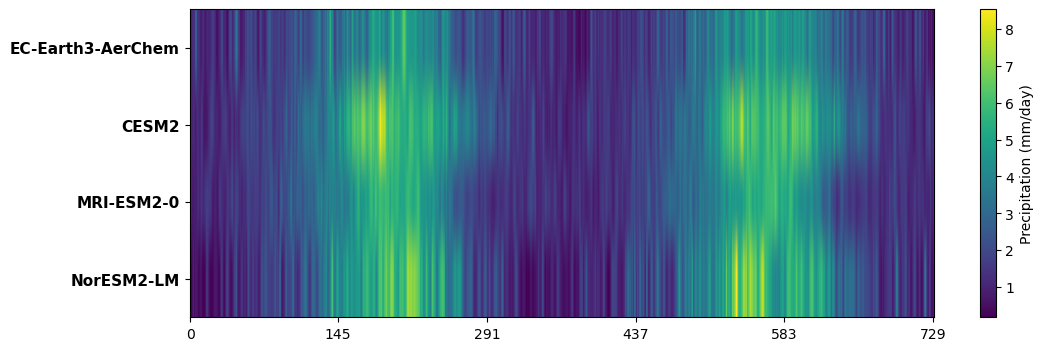

In [70]:
models = ['EC-Earth3-AerChem', 'CESM2', 'MRI-ESM2-0', 'NorESM2-LM']
all_data = [ec_mean, cesm2_mean, mri_mean, noresm_mean]

# Make sure they all have the same time coordinate
time = all_data[0]['time']
data_matrix = np.vstack([d.values for d in all_data])  # shape (models, time)

# Compute color limits
vmin = np.nanmin(data_matrix)
vmax = np.nanmax(data_matrix)

# Plot as heatmap
fig, ax = plt.subplots(figsize=(12, 4))
im = ax.imshow(data_matrix, aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, label='Precipitation (mm/day)')

# Set axes
ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models, fontsize=11, fontweight='bold')
ax.set_xticks(np.linspace(0, len(time)-1, 6).astype(int))
ax.set_xticklabels([str(np.datetime_as_string(t.values, unit='M')) for t in time[::len(time)//6]])


ax.set_xlabel('Time')
ax.set_title('Historical Precipitation (1961–1962): Multi-Model Mean Comparison', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()